In [2]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
p2021_1=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation_2021_1.csv")
p2021_2=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation_2021_2.csv")
p2021_3=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation_2021_3.csv")
p2021_4=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation_2021_4.csv")
p2022_1=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation_2022_1.csv")
p2022_2=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation_2022_2.csv")
p2022_3=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation_2022_3.csv")
p2022_4=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation_2022_4.csv")

In [4]:
rad2021=pd.concat([p2021_1,p2021_2,p2021_3,p2021_4],axis=0,ignore_index=True)
rad2022=pd.concat([p2022_1,p2022_2,p2022_3,p2022_4],axis=0,ignore_index=True)

In [5]:
rows=rad2021.shape[0]
cols=rad2021.shape[1]
rows,cols

(4182, 13)

In [6]:
new=list()
for x in rad2021['AC_NAME']:
    x=''.join(i for i in x.title())
    new.append(x)
rad2021.insert(0,'AC_Name',new)
rad2021=rad2021.drop(['AC_NAME'],axis=1)

new=list()
for x in rad2022['AC_NAME']:
    x=''.join(i for i in x.title())
    new.append(x)
rad2022.insert(0,'AC_Name',new)
rad2022=rad2022.drop(['AC_NAME'],axis=1)

In [7]:
radyears=[rad2021,rad2022]

In [7]:
keys=["January","February","March","April","May","June","July","August","September","October","November","December"]

vals22=list()
vals21=list()

for i in range (1,13):
    thism21=thism22=0
    for j in range(rows):
        thism21=thism21+rad2021.iloc[j,i]
        thism22=thism22+rad2022.iloc[j,i]
    vals21.append(thism21)
    vals22.append(thism22)

monthly21={keys[i]: vals21[i] for i in range(len(keys))}
monthly22={keys[i]: vals22[i] for i in range(len(keys))}

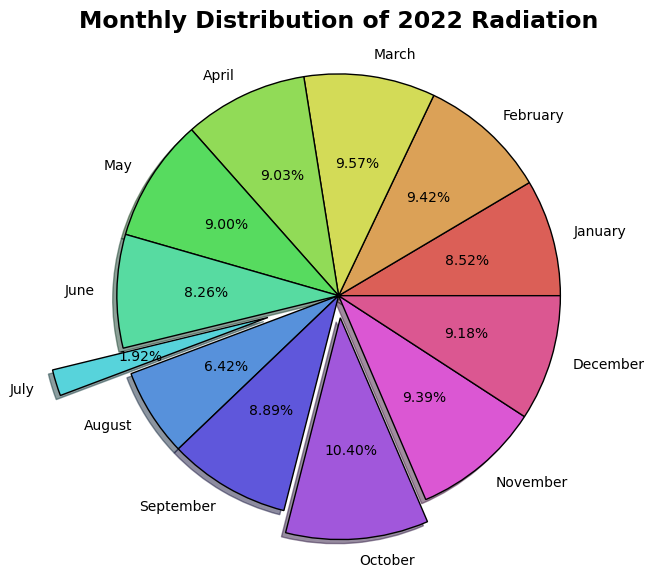

In [8]:
plt.pie(vals22, labels = keys, radius=1.5, autopct='%1.2f%%', textprops={"fontsize":10},
        wedgeprops={"edgecolor":"black"},colors=sns.color_palette('hls',12),explode=[0,0,0,0,0,0,0.5,0,0,0.15,0,0],shadow=True)
plt.title('Monthly Distribution of 2022 Radiation', fontdict = {'size' : '17', 'fontweight' : 'bold'},pad=60)
plt.show()

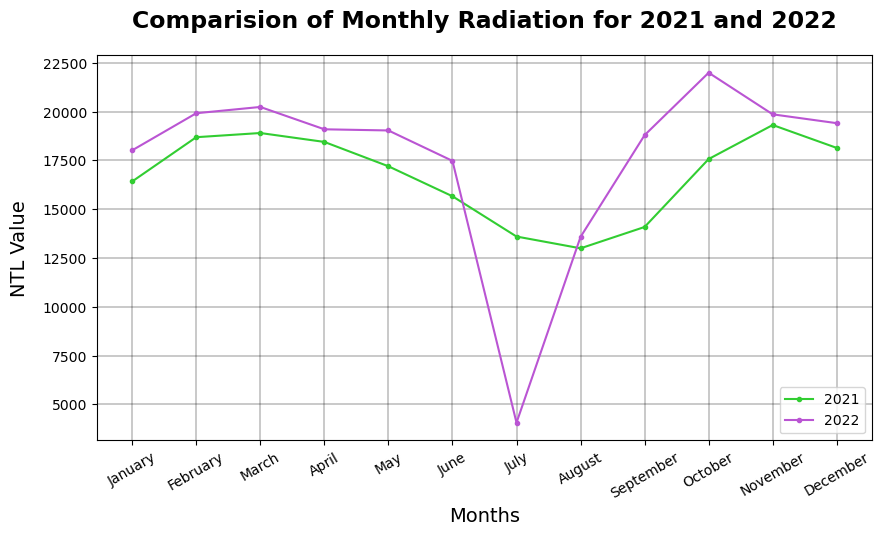

In [9]:
plt.figure(figsize=(10,5))
plt.plot(list(monthly21.keys()), list(monthly21.values()),marker=".",color='limegreen')
plt.plot(list(monthly22.keys()), list(monthly22.values()),marker=".",color='mediumorchid')
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.legend(["2021", "2022"], loc ="lower right")
plt.title('Comparision of Monthly Radiation for 2021 and 2022', fontdict = {'size' : '17', 'fontweight' : 'bold'},pad=20)
plt.xlabel("Months", fontsize=14)
plt.ylabel("NTL Value", fontsize=14, labelpad=10)
plt.xticks(rotation = 30)
plt.show()

In [8]:
avg2021=dict()
avg2022=dict()
total2022=dict()
total2021=dict()

for index in range (len(rad2021)):
    ac=rad2021.iloc[index][0]
    sum1=0
    sum2=0
    for k in range (1,12):
        sum1=sum1+(rad2021.iloc[index][k])
        sum2=sum2+(rad2022.iloc[index][k])
    total2021[ac]=sum1
    total2022[ac]=sum2
    avg1=sum1/12
    avg2=sum2/12
    avg2021[ac]=avg1
    avg2022[ac]=avg2
    
avgdiff=dict()
for i in avg2021:
    avgdiff[i]=avg2022[i]-avg2021[i]
    
maxdiff=sorted(avgdiff.items(), key=lambda x:x[1],reverse=True)[:50]
mindiff=sorted(avgdiff.items(), key=lambda x:abs(x[1]))[:50]
top2021=sorted(avg2021.items(), key=lambda x:x[1],reverse=True)
top2022=sorted(avg2022.items(), key=lambda x:x[1],reverse=True)

In [11]:
ac=list()
r1=list()
r2=list()

for i in top2022[:30]:
    ac.append(i[0])
    r1.append(total2021[i[0]])
    r2.append(total2022[i[0]]) 
    
topcompare=pd.DataFrame({'AC':ac, 'Total 2021':r1, 'Total 2022':r2})

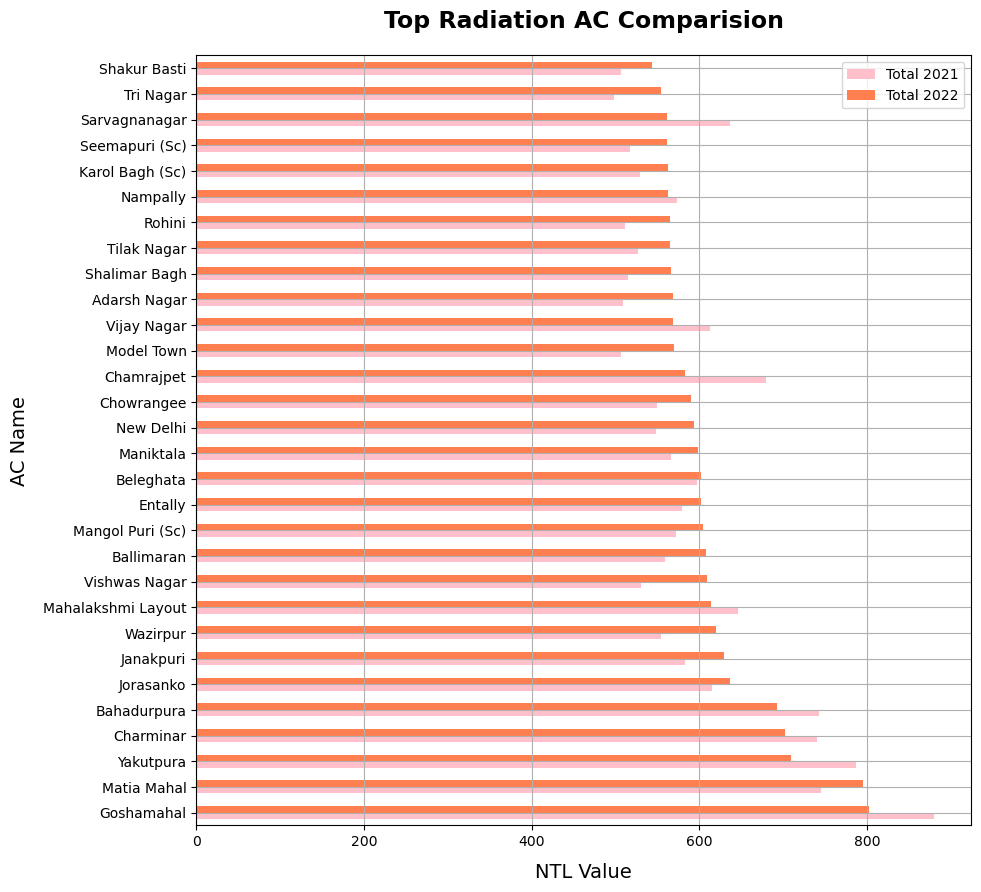

In [12]:
ax=topcompare.plot(x="AC", y=["Total 2021", "Total 2022"],
                   color=['pink','coral'],
                   kind="barh",
                   figsize=(10,10),
                   grid=True)
ax.set_xlabel("NTL Value",fontsize=14, labelpad=10)
ax.set_ylabel("AC Name", fontsize=14, labelpad=10)
ax.set_title("Top Radiation AC Comparision", fontsize=17, fontweight='bold', pad=20)
plt.show()

In [13]:
ac=list()
diff=list()
d1=list()
d2=list()

for i in maxdiff:
    ac.append(i[0])
    diff.append(i[1])
    d1.append(avg2021[i[0]])
    d2.append(avg2022[i[0]])    
    
topdiff=pd.DataFrame({'AC':ac, 'Average 2021':d1, 'Average 2022':d2,'Difference':diff})

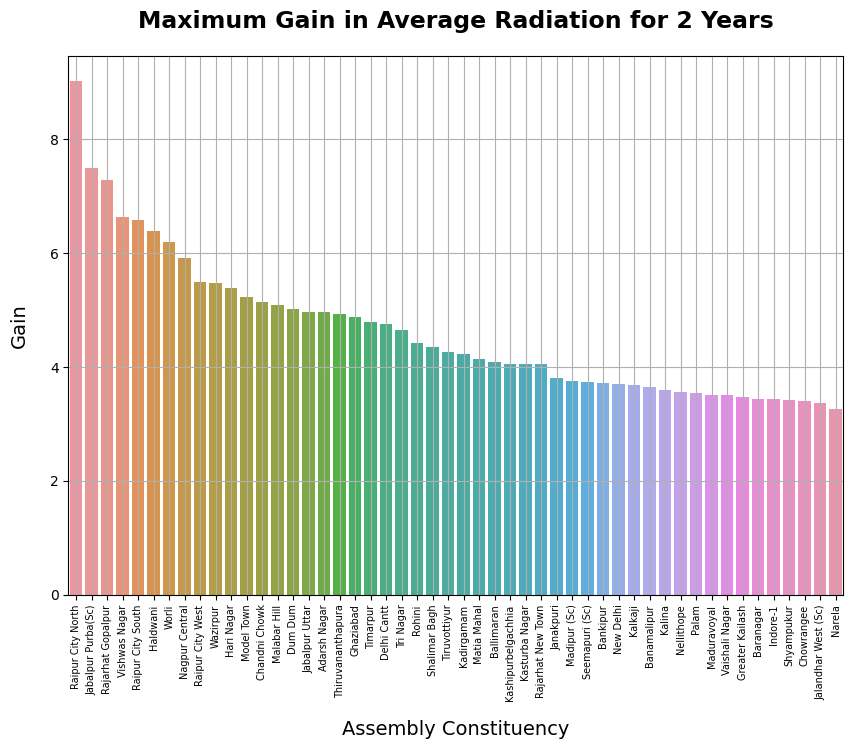

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(data=topdiff, x="AC", y="Difference")
plt.title("Maximum Gain in Average Radiation for 2 Years", fontsize=17, fontweight='bold', pad=20)
plt.xticks(fontsize=7,rotation = 90)
plt.xlabel("Assembly Constituency", fontsize=14, labelpad=14)
plt.ylabel("Gain", fontsize=14, labelpad=15)
plt.grid()
plt.show()

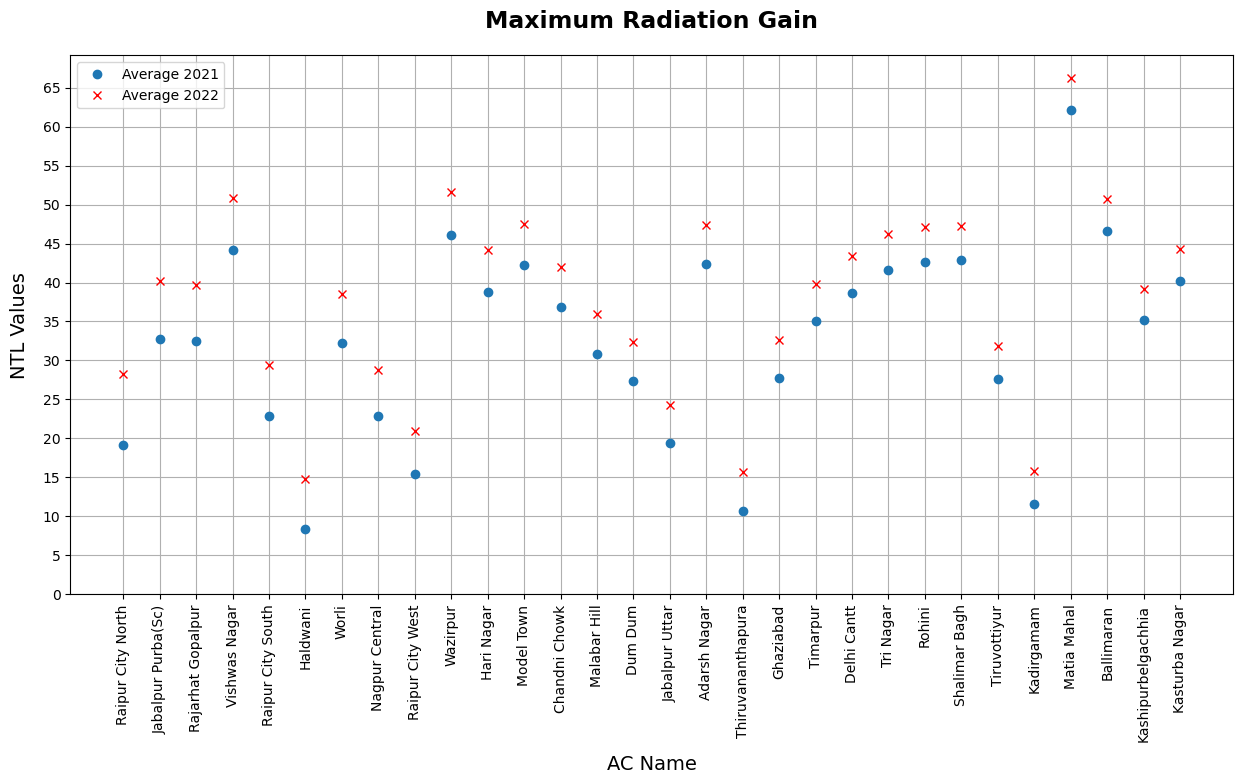

In [15]:
temp=topdiff[['AC','Average 2021','Average 2022']][:30]
ax=temp.plot(x='AC',style=['o','rx'],figsize=(15,7),grid=True)
ax.xaxis.set_ticks(np.arange(0,30))
ax.yaxis.set_ticks(np.arange(0,70,5))
ax.set_xticklabels(labels=topdiff['AC'][:30])
ax.set_xlabel("AC Name",fontsize=14, labelpad=10)
ax.set_ylabel("NTL Values", fontsize=14, labelpad=10)
ax.set_title("Maximum Radiation Gain", fontsize=17, fontweight='bold', pad=20)
plt.xticks(rotation =90)
plt.show()

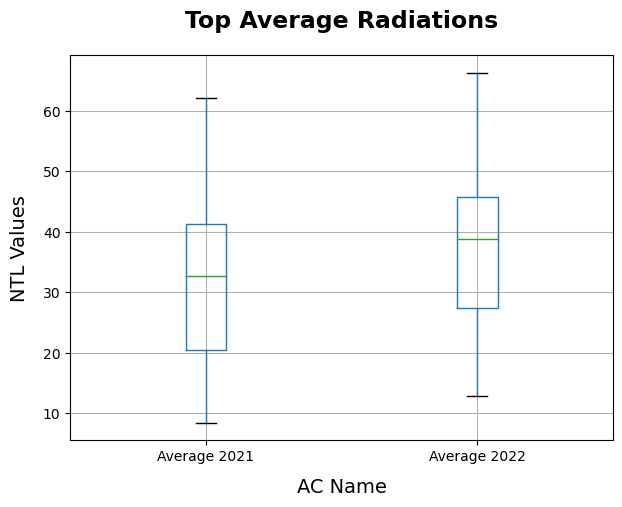

In [16]:
temp=topdiff[['Average 2021','Average 2022']]
ax=temp.boxplot(return_type='axes',figsize=(7,5),grid=True)
ax.set_xlabel("AC Name",fontsize=14, labelpad=10)
ax.set_ylabel("NTL Values", fontsize=14, labelpad=10)
ax.set_title("Top Average Radiations", fontsize=17, fontweight='bold', pad=20)
plt.show()

In [100]:
keys=["Year","Month","Radiation"]
hmap=pd.DataFrame(columns=keys)

year=['2021']*12
for i in range(12):
    year.append('2022')

month=["January","February","March","April","May","June","July","August","September","October","November","December"]*2

rad=list()
for i in monthly21:
    rad.append(monthly21[i])
for i in monthly22:
    rad.append(monthly22[i])

In [96]:
hmap

,Year,Month,Radiation
